<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/demo_hpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 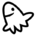 deepdriver hpo quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver & requirement package for train

In [1]:
pip install deepdriver==0.17.19

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 74.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.8 MB/s eta 0:00:00
  Created wheel for assertpy: filename=assertpy-1.1-py3-none-

#1. ➕ import deepdriver & deeplearnig framework



In [2]:
import tensorflow as tf

In [3]:
import deepdriver

#2. prepare dataset

In [4]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2023-04-26 01:34:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 74.125.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  27.7MB/s    in 2.4s    

2023-04-26 01:34:57 (27.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
import os
import zipfile
import shutil

train_dir = '/content/cat_dog/'
if os.path.isdir(train_dir):
  shutil.rmtree(train_dir)
  os.mkdir(train_dir)
else:
  os.mkdir(train_dir)

model_dir = '/content/model'

if os.path.isdir(model_dir):
  shutil.rmtree(model_dir)
  os.mkdir(model_dir)
else:
  os.mkdir(model_dir)
local_zip = '/tmp/cats_and_dogs_filtered.zip'
data_dir ='/tmp/cats_and_dogs_filtered/train'
data_doc_dir='/tmp/cats_and_dogs_filtered/train/dogs'
data_cat_dir='/tmp/cats_and_dogs_filtered/train/cats'
valid_dir ='/tmp/cats_and_dogs_filtered/validation'
data_dog_valid_dir='/tmp/cats_and_dogs_filtered/validation/dogs'
data_cat_valid_dir='/tmp/cats_and_dogs_filtered/validation/cats'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
# train용 폴더 생성
train_set_dir = os.path.join(train_dir, 'train_set')
os.mkdir(train_set_dir)
train_dog_dir = os.path.join(train_set_dir, 'dog')
os.mkdir(train_dog_dir)
train_cat_dir = os.path.join(train_set_dir, 'cat')
os.mkdir(train_cat_dir)
# valid용 폴더 생성
valid_set_dir = os.path.join(train_dir, 'valid_set')
os.mkdir(valid_set_dir)
valid_dog_dir = os.path.join(valid_set_dir, 'dog')
os.mkdir(valid_dog_dir)
valid_cat_dir = os.path.join(valid_set_dir, 'cat')
os.mkdir(valid_cat_dir)
# test용 폴더 생성
test_set_dir = os.path.join(train_dir, 'test_set')
os.mkdir(test_set_dir)
test_dog_dir = os.path.join(test_set_dir, 'dog')
os.mkdir(test_dog_dir)
test_cat_dir = os.path.join(test_set_dir, 'cat')
os.mkdir(test_cat_dir)

In [7]:
# image file name list 생성
import shutil
total_data_count =1000
train_data_count =int(total_data_count*0.8)
test_data_count = int(total_data_count*0.1)
valid_data_count =total_data_count - train_data_count -test_data_count
dog_files = [f'dog.{i}.jpg' for i in range(total_data_count)]
cat_files = [f'cat.{i}.jpg' for i in range(total_data_count)]

 
# 각 폴더로 image 이동
for file in dog_files[:train_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(train_dog_dir, file)
    shutil.move(src, dst)
    
for file in dog_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(valid_dog_dir, file)
    shutil.move(src, dst)
 
for file in dog_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(test_dog_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[:train_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(train_cat_dir, file)
    shutil.move(src, dst)
    
for file in cat_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(valid_cat_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(test_cat_dir, file)
    shutil.move(src, dst)

In [8]:
train_cat_fnames = os.listdir( train_cat_dir )
train_dog_fnames = os.listdir( train_dog_dir )

In [9]:
print('Total training cat images :', len(os.listdir(train_cat_dir)))
print('Total training dog images :', len(os.listdir(train_dog_dir)))

print('Total validation cat images :', len(os.listdir(valid_cat_dir)))
print('Total validation dog images :', len(os.listdir(valid_dog_dir)))


print('Total test cat images :', len(os.listdir(test_cat_dir)))
print('Total test dog images :', len(os.listdir(test_dog_dir)))

Total training cat images : 800
Total training dog images : 800
Total validation cat images : 100
Total validation dog images : 100
Total test cat images : 100
Total test dog images : 100


#2. ⚙ deepdriver server setting

In [10]:
deepdriver.setting(http_host="20220701-dev-api.bokchi.com:443" ,grpc_host="20220701-dev-file.bokchi.com:443", use_grpc_tls =True, use_https=True)

#3. 🔌 log in to deepdriver

In [11]:
deepdriver.login_with()

Dropdown(description='Choose your login method\nIf you select "google", google login proceeds\n and if you sel…

In [12]:
deepdriver.login()

Please go to this URL: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=1083953718757-uu062r3d7243he1nat9fourmjfg9kskp.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.profile+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=oIaSjfCwXHeRSlT4pecGCeJBY2rsY8&prompt=consent&access_type=offline
Enter the authorization code: 4/1AVHEtk7XApVrgJKKb8yyQnu9vK8SD6SIn7SI5MHpLv3jKojMYR297_6_ZUI


True

#4. 🥼 create hpo

In [13]:
experiment_name="cat_dog_cnn_hpo"

In [14]:
hpo_configuration = {
    "metric": {"name": "accuracy", "goal": "maximize"},
    "method": "grid",
    "parameters": {
        "batch_size": {
            "values": [32,64,128]
        },
        "learning_rate": {
            "values": [10e-1,10e-2,10e-3,10e-4,10e-5]
        },
        "hidden_layer":{
            "values": [32,64,128]
        },
        "epoch" :{
            "values": [10]
        }

    }
}

In [15]:
# experiment init & config hyperparam
deepdriver.create_hpo(exp_name= experiment_name,hpo_config= hpo_configuration)

HPO initialized
Team Name=_mola.sojeong.gmail4
Exp Name=cat_dog_cnn_hpo
Exp Url=/experi/_mola.sojeong.gmail4/cat_dog_cnn_hpo/exp/chart


[I 2023-04-26 01:36:56,730] A new study created in RDB with name: _mola.sojeong.gmail4_cat_dog_cnn_hpo


('success', 1111)

#5. 📚 train your code and send log

make model

In [16]:
def define_model(hidden_layer, learning_rate):

  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hidden_layer, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  from tensorflow.keras.optimizers import RMSprop

  model.compile(optimizer=RMSprop(lr=learning_rate),
            loss='binary_crossentropy',
            metrics = ['accuracy'])
  return model

In [17]:
def prepare_data(batch_size):
  from tensorflow.keras.preprocessing.image import ImageDataGenerator

  train_datagen = ImageDataGenerator( rescale = 1.0/255. )
  test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
  valid_datagen  = ImageDataGenerator( rescale = 1.0/255. )

  train_generator = train_datagen.flow_from_directory(train_set_dir,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
  validation_generator =  valid_datagen.flow_from_directory(valid_set_dir,
                                                        batch_size=batch_size,
                                                        class_mode  = 'binary',
                                                        target_size = (150, 150))

  test_generator =  test_datagen.flow_from_directory(test_set_dir,
                                                        batch_size=batch_size,
                                                        class_mode  = 'binary',
                                                        target_size = (150, 150))
  return train_generator, validation_generator, test_generator

In [18]:
def train():
  import tensorflow as tf 
  print(deepdriver.config.Items())
  model = define_model(deepdriver.config.hidden_layer, deepdriver.config.learning_rate)
  
  train_generator, validation_generator, test_generator = prepare_data(deepdriver.config.batch_size)

  class CustomCallback(tf.keras.callbacks.Callback):

    # def on_train_end(self, logs=None):
    #     keys = list(logs.keys())
    #     deepdriver.finish()

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        deepdriver.log({"acc": logs["accuracy"], "loss": logs["loss"], "val_acc": logs["val_accuracy"], "val_loss": logs["val_loss"]})
        #deepdriver.log(logs)

  steps_per_epoch = train_generator.n//deepdriver.config.batch_size
  validation_steps = validation_generator.n//deepdriver.config.batch_size

  history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()],
                    verbose=2)
  result = model.evaluate(test_generator)
  result_dict =dict(zip(model.metrics_names, result))
  print(result_dict)
  return result_dict["accuracy"]


In [19]:
 deepdriver.run_hpo(exp_name=experiment_name, func=train, count=10)

DeepDriver initialized
Team Name=_mola.sojeong.gmail4
Exp Name=cat_dog_cnn_hpo
Run Name=run-1
Run URL=https://20220701-dev-board.bokchi.com/_mola.sojeong.gmail4/cat_dog_cnn_hpo/runs/run-1/charts
[('batch_size', 32), ('learning_rate', 0.0001), ('hidden_layer', 32), ('epoch', 10)]


Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
50/50 - 19s - loss: 0.7346 - accuracy: 0.5038 - val_loss: 0.6848 - val_accuracy: 0.5052 - 19s/epoch - 381ms/step
Epoch 2/10
50/50 - 7s - loss: 0.6806 - accuracy: 0.5706 - val_loss: 0.6552 - val_accuracy: 0.6510 - 7s/epoch - 133ms/step
Epoch 3/10
50/50 - 8s - loss: 0.6438 - accuracy: 0.6381 - val_loss: 0.6127 - val_accuracy: 0.6615 - 8s/epoch - 153ms/step
Epoch 4/10
50/50 - 6s - loss: 0.6083 - accuracy: 0.6762 - val_loss: 0.5956 - val_accuracy: 0.6875 - 6s/epoch - 130ms/step
Epoch 5/10
50/50 - 6s - loss: 0.5532 - accuracy: 0.7225 - val_loss: 0.6246 - val_accuracy: 0.6562 - 6s/epoch - 127ms/step
Epoch 6/10
50/50 - 8s - loss: 0.5307 - accuracy: 0.7294 - val_loss: 0.5869 - val_accuracy: 0.6719 - 8s/epoch - 153ms/step
Epoch 7/10
50/50 - 6s - loss: 0.4918 - accuracy: 0.7519 - val_loss: 0.5708 - val_accuracy: 0.6823 - 6s/epoch - 130ms/step
Epoch 8/10
50/50 - 6

[I 2023-04-26 01:39:49,955] Trial 0 finished with value: 0.6949999928474426 and parameters: {'batch_size': 32, 'learning_rate': 0.0001, 'hidden_layer': 32, 'epoch': 10}. Best is trial 0 with value: 0.6949999928474426.


DeepDriver initialized
Team Name=_mola.sojeong.gmail4
Exp Name=cat_dog_cnn_hpo
Run Name=run-2
Run URL=https://20220701-dev-board.bokchi.com/_mola.sojeong.gmail4/cat_dog_cnn_hpo/runs/run-2/charts


[('batch_size', 64), ('learning_rate', 0.001), ('hidden_layer', 32), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
25/25 - 10s - loss: 0.7067 - accuracy: 0.5412 - val_loss: 0.6812 - val_accuracy: 0.5104 - 10s/epoch - 414ms/step
Epoch 2/10
25/25 - 6s - loss: 0.6847 - accuracy: 0.5487 - val_loss: 0.6691 - val_accuracy: 0.6302 - 6s/epoch - 253ms/step
Epoch 3/10
25/25 - 9s - loss: 0.6614 - accuracy: 0.6400 - val_loss: 0.6315 - val_accuracy: 0.6354 - 9s/epoch - 357ms/step
Epoch 4/10
25/25 - 7s - loss: 0.6293 - accuracy: 0.6619 - val_loss: 0.5990 - val_accuracy: 0.7083 - 7s/epoch - 283ms/step
Epoch 5/10
25/25 - 6s - loss: 0.5769 - accuracy: 0.7019 - val_loss: 0.6091 - val_accuracy: 0.6250 - 6s/epoch - 251ms/step
Epoch 6/10
25/25 - 8s - loss: 0.5572 - accuracy: 0.7081 - val_loss: 0.5597 - val_accuracy: 0.7240 - 8s/epoch - 301ms/step
Epoch 7/10
25/25 - 6s - loss: 0.4997 - accuracy: 0.7606 - 

[I 2023-04-26 01:41:39,204] Trial 1 finished with value: 0.75 and parameters: {'batch_size': 64, 'learning_rate': 0.001, 'hidden_layer': 32, 'epoch': 10}. Best is trial 1 with value: 0.75.


DeepDriver initialized
Team Name=_mola.sojeong.gmail4
Exp Name=cat_dog_cnn_hpo
Run Name=run-3
Run URL=https://20220701-dev-board.bokchi.com/_mola.sojeong.gmail4/cat_dog_cnn_hpo/runs/run-3/charts


[('batch_size', 64), ('learning_rate', 0.0001), ('hidden_layer', 64), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
25/25 - 8s - loss: 0.7300 - accuracy: 0.5294 - val_loss: 0.6776 - val_accuracy: 0.5573 - 8s/epoch - 329ms/step
Epoch 2/10
25/25 - 7s - loss: 0.6735 - accuracy: 0.5619 - val_loss: 0.7067 - val_accuracy: 0.4896 - 7s/epoch - 270ms/step
Epoch 3/10
25/25 - 7s - loss: 0.6656 - accuracy: 0.5781 - val_loss: 0.6736 - val_accuracy: 0.5365 - 7s/epoch - 296ms/step
Epoch 4/10
25/25 - 6s - loss: 0.6358 - accuracy: 0.6556 - val_loss: 0.6447 - val_accuracy: 0.6146 - 6s/epoch - 250ms/step
Epoch 5/10
25/25 - 10s - loss: 0.6255 - accuracy: 0.6475 - val_loss: 0.6028 - val_accuracy: 0.6771 - 10s/epoch - 383ms/step
Epoch 6/10
25/25 - 6s - loss: 0.6006 - accuracy: 0.6950 - val_loss: 0.5986 - val_accuracy: 0.6823 - 6s/epoch - 251ms/step
Epoch 7/10
25/25 - 8s - loss: 0.5742 - accuracy: 0.7063 -

[I 2023-04-26 01:43:30,366] Trial 2 finished with value: 0.6549999713897705 and parameters: {'batch_size': 64, 'learning_rate': 0.0001, 'hidden_layer': 64, 'epoch': 10}. Best is trial 1 with value: 0.75.


DeepDriver initialized
Team Name=_mola.sojeong.gmail4
Exp Name=cat_dog_cnn_hpo
Run Name=run-4
Run URL=https://20220701-dev-board.bokchi.com/_mola.sojeong.gmail4/cat_dog_cnn_hpo/runs/run-4/charts


[('batch_size', 64), ('learning_rate', 0.001), ('hidden_layer', 32), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
25/25 - 10s - loss: 0.7227 - accuracy: 0.5038 - val_loss: 0.6852 - val_accuracy: 0.5052 - 10s/epoch - 386ms/step
Epoch 2/10
25/25 - 6s - loss: 0.6820 - accuracy: 0.5650 - val_loss: 0.6695 - val_accuracy: 0.5521 - 6s/epoch - 254ms/step
Epoch 3/10
25/25 - 6s - loss: 0.6561 - accuracy: 0.6331 - val_loss: 0.6263 - val_accuracy: 0.6302 - 6s/epoch - 255ms/step
Epoch 4/10
25/25 - 7s - loss: 0.6242 - accuracy: 0.6712 - val_loss: 0.6056 - val_accuracy: 0.6719 - 7s/epoch - 280ms/step
Epoch 5/10
25/25 - 7s - loss: 0.5757 - accuracy: 0.6975 - val_loss: 0.6357 - val_accuracy: 0.6406 - 7s/epoch - 280ms/step
Epoch 6/10
25/25 - 6s - loss: 0.5531 - accuracy: 0.7169 - val_loss: 0.6369 - val_accuracy: 0.6615 - 6s/epoch - 250ms/step
Epoch 7/10
25/25 - 7s - loss: 0.5475 - accuracy: 0.7300 - 

[I 2023-04-26 01:45:23,824] Trial 3 finished with value: 0.675000011920929 and parameters: {'batch_size': 64, 'learning_rate': 0.001, 'hidden_layer': 32, 'epoch': 10}. Best is trial 1 with value: 0.75.


DeepDriver initialized
Team Name=_mola.sojeong.gmail4
Exp Name=cat_dog_cnn_hpo
Run Name=run-5
Run URL=https://20220701-dev-board.bokchi.com/_mola.sojeong.gmail4/cat_dog_cnn_hpo/runs/run-5/charts


[('batch_size', 128), ('learning_rate', 1.0), ('hidden_layer', 128), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
12/12 - 10s - loss: 0.8866 - accuracy: 0.5143 - val_loss: 0.6884 - val_accuracy: 0.4922 - 10s/epoch - 865ms/step
Epoch 2/10
12/12 - 7s - loss: 0.6859 - accuracy: 0.5442 - val_loss: 0.6758 - val_accuracy: 0.6172 - 7s/epoch - 612ms/step
Epoch 3/10
12/12 - 6s - loss: 0.6811 - accuracy: 0.5469 - val_loss: 0.6675 - val_accuracy: 0.6797 - 6s/epoch - 538ms/step
Epoch 4/10
12/12 - 7s - loss: 0.6907 - accuracy: 0.5992 - val_loss: 0.6848 - val_accuracy: 0.5781 - 7s/epoch - 588ms/step
Epoch 5/10
12/12 - 8s - loss: 0.6663 - accuracy: 0.6243 - val_loss: 0.6836 - val_accuracy: 0.5781 - 8s/epoch - 648ms/step
Epoch 6/10
12/12 - 6s - loss: 0.6702 - accuracy: 0.6298 - val_loss: 0.6774 - val_accuracy: 0.6328 - 6s/epoch - 538ms/step
Epoch 7/10
12/12 - 7s - loss: 0.6545 - accuracy: 0.6807 - 

[I 2023-04-26 01:47:22,022] Trial 4 finished with value: 0.5550000071525574 and parameters: {'batch_size': 128, 'learning_rate': 1.0, 'hidden_layer': 128, 'epoch': 10}. Best is trial 1 with value: 0.75.


DeepDriver initialized
Team Name=_mola.sojeong.gmail4
Exp Name=cat_dog_cnn_hpo
Run Name=run-6
Run URL=https://20220701-dev-board.bokchi.com/_mola.sojeong.gmail4/cat_dog_cnn_hpo/runs/run-6/charts


[W 2023-04-26 01:47:33,751] Trial 5 failed with parameters: {'batch_size': 64} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/usr/local/lib/python3.9/dist-packages/deepdriver/sdk/experiment.py", line 254, in <lambda>
    return lambda trial: objective(trial, exp_name, team_name, func, config)
  File "/usr/local/lib/python3.9/dist-packages/deepdriver/sdk/experiment.py", line 258, in objective
    get_config(trial, config)
  File "/usr/local/lib/python3.9/dist-packages/deepdriver/sdk/experiment.py", line 293, in get_config
    exec(f'deepdriver.config.{key} = trial.suggest_categorical("{key}", {values})')
  File "<string>", line 1, in <module>
  File "/usr/local/lib/python3.9/dist-packages/optuna/trial/_trial.py", line 401, in suggest_categorical
    return self._suggest(name, CategoricalDistribution(choices

KeyboardInterrupt: ignored